# Analysis

For this exercise, I took a random sample of 500 cities across the globe, specifically between -90 and 90 degrees latitude to look for data to answer the question "What's the weather like as we approach the equator?"

I got my list of cities by randomly picking a latitude between -90 and 90 degrees and a longitude between -180 and 180 degrees and using the "citipy" library to find the nearest city to those coordinates.  Once the city was found, I used the OpenWeatherMap API to find the weather. If the weather data doesn't exist, the city is discarded and the script looks for another set of coordinates until it collects 500. 

The first thing I noticed was that regardless of how many times I run the script, the data points fall between -60 and 80 degrees longitude even though the random function is set between -90 and 90. It makes sense once you look at a map and notice that the only thing south of 60 degrees latitude is the Antartic Circle and north of 80 degrees is the Artic Circle, so although coordinates may have come up for those areas, it is highly unlikely that weather data was available and therefore, not in the data set. For this exercise, gathering additional data for this part of the world wouldn't alter the trend the current data is displaying, so I didn't investigate further.

The assumption is that the weather gets warmer and more humid the closer one gets to the equator.  The first graph, City Latitude vs. Max Temperature supports that assumption, with the highest temperatures occurring within 20 degrees latitude north or south from the equator and the temperatures continue declining as you move away from the equator. The second graph, City Latitude vs. Humidity does not support my assumption of being more humid the closer one gets to the equator. Where the highest temperatres are seen, between -20 and 20 degrees latitude, the humidity ranges from 20% to 100% and at the edges, -40 and 80 degrees latitude, there are cities with humidity between 80% and 100%. One might think it is more humid closer to the equator because the temperature is higher making it miserable, but it does seem that humidity is not affected by the proximity to the equator. 

I don't know much about the weather, but I didn't expect cloudiness or wind speed to be a useful descriptor of the weather near the equator, and they turned out not to be. Significant weather patterns used to describe the equator usually only include heat and humidity. As with humidity, the chartd City Latitude vs. Cloudiness and City Latitude vs. Wind Speed, show that there is no significant trend of either at the equator. What was expected was that the Cloudiness and Humidity charts to corrolate more than they seem to. 

In [1]:
from citipy import citipy
from config import api_key
import openweathermapy.core as owm
import requests
import random
import pandas as pd
import matplotlib.pyplot as plt

# Generate Cities List and Make API Calls

In [2]:
cities = []
countries = []
date = []
latitude = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
counter = 1
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
records = 500

print("Beginning Data Retrieval")
print("------------------------------")
while counter <= records:
    lat = random.randint(-90,90)
    long = random.randint(-180,180)    
    city_data = citipy.nearest_city(lat, long)
    city = city_data.city_name
    country = city_data.country_code
    
    if not city in cities:
        try: 
            query_url = f"{url}appid={api_key}&units={units}&q={city}"
            weather_data = requests.get(query_url).json()
            cities.append(city) 
            countries.append(country)
            date.append(weather_data["dt"])
            latitude.append(weather_data["coord"]["lat"])
            max_temp.append(weather_data["main"]["temp_max"])
            humidity.append(weather_data["main"]["humidity"])
            clouds.append(weather_data["clouds"]["all"])
            wind_speed.append(weather_data["wind"]["speed"])
            print(f"Processing Record {counter} of {records} | {city}")
            print(f"{query_url}")
            counter += 1
        except:
            cities.remove(city)
            countries.remove(country)
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")


Beginning Data Retrieval
------------------------------
Processing Record 1 of 500 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=saint-philippe
Processing Record 2 of 500 | plast
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=plast
Processing Record 3 of 500 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=rikitea
Processing Record 4 of 500 | albany
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=albany
Processing Record 5 of 500 | amberley
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=amberley
Processing Record 6 of 500 | muroto
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=muroto
Processing Record 7 of 500 | iquitos
http://api.

Processing Record 57 of 500 | hirara
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=hirara
Processing Record 58 of 500 | pisco
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=pisco
Processing Record 59 of 500 | tonstad
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=tonstad
Processing Record 60 of 500 | seoul
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=seoul
Processing Record 61 of 500 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=hobart
Processing Record 62 of 500 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=puerto ayora
Processing Record 63 of 500 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a944

Processing Record 112 of 500 | yar-sale
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=yar-sale
Processing Record 113 of 500 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=guerrero negro
Processing Record 114 of 500 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=leningradskiy
Processing Record 115 of 500 | bulungu
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=bulungu
Processing Record 116 of 500 | mtwara
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=mtwara
Processing Record 117 of 500 | varkkallai
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=varkkallai
Processing Record 118 of 500 | samarai
http://api.openweathermap.org

Processing Record 166 of 500 | lagoa
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=lagoa
Processing Record 167 of 500 | constitucion
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=constitucion
Processing Record 168 of 500 | kirakira
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=kirakira
Processing Record 169 of 500 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=port elizabeth
Processing Record 170 of 500 | lapua
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=lapua
Processing Record 171 of 500 | yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=yellowknife
Processing Record 172 of 500 | igrim
http://api.openweathermap.org/data/2.

Processing Record 221 of 500 | tokonou
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=tokonou
Processing Record 222 of 500 | okha
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=okha
Processing Record 223 of 500 | carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=carnarvon
Processing Record 224 of 500 | namtsy
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=namtsy
Processing Record 225 of 500 | kultuk
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=kultuk
Processing Record 226 of 500 | broken hill
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=broken hill
Processing Record 227 of 500 | dingle
http://api.openweathermap.org/data/2.5/weather?appid=68849a8

Processing Record 275 of 500 | nelson bay
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=nelson bay
Processing Record 276 of 500 | khandyga
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=khandyga
Processing Record 277 of 500 | cody
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=cody
Processing Record 278 of 500 | panaba
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=panaba
Processing Record 279 of 500 | chicama
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=chicama
Processing Record 280 of 500 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=dikson
Processing Record 281 of 500 | omboue
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03

Processing Record 329 of 500 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=qaqortoq
Processing Record 330 of 500 | talnakh
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=talnakh
Processing Record 331 of 500 | caxito
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=caxito
Processing Record 332 of 500 | porto belo
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=porto belo
Processing Record 333 of 500 | murmansk
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=murmansk
Processing Record 334 of 500 | tonk
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=tonk
Processing Record 335 of 500 | sorland
http://api.openweathermap.org/data/2.5/weather?appid=68849a

Processing Record 384 of 500 | malartic
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=malartic
Processing Record 385 of 500 | flinders
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=flinders
Processing Record 386 of 500 | inhambane
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=inhambane
Processing Record 387 of 500 | onguday
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=onguday
Processing Record 388 of 500 | hovd
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=hovd
Processing Record 389 of 500 | mayo
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=mayo
Processing Record 390 of 500 | sibolga
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a

Processing Record 439 of 500 | muriwai beach
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=muriwai beach
Processing Record 440 of 500 | bay city
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=bay city
Processing Record 441 of 500 | plettenberg bay
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=plettenberg bay
Processing Record 442 of 500 | bhuban
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=bhuban
Processing Record 443 of 500 | villa guerrero
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=villa guerrero
Processing Record 444 of 500 | jiexiu
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=jiexiu
Processing Record 445 of 500 | kamenka
http://api.openweathe

Processing Record 493 of 500 | rudnaya pristan
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=rudnaya pristan
Processing Record 494 of 500 | guadalupe y calvo
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=guadalupe y calvo
Processing Record 495 of 500 | camapua
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=camapua
Processing Record 496 of 500 | danane
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=danane
Processing Record 497 of 500 | lac du bonnet
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=lac du bonnet
Processing Record 498 of 500 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=beringovskiy
Processing Record 499 of 500 | athabasca
htt

# Consolidate Weather Data

In [4]:
data = {"City" : cities, "Country": countries, "Date": date,"Latitude": latitude, "Max Temp": max_temp,\
        "Humidity": humidity, "Cloudiness": clouds, "Wind Speed": wind_speed}
city_weather = pd.DataFrame(data)
city_weather.to_csv("city_weather.csv")
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Max Temp,Wind Speed
0,saint-philippe,1,re,1527648900,76,45.36,68.00,5.50
1,plast,12,pf,1527650933,61,54.37,43.86,6.17
2,rikitea,0,jp,1527648764,100,-23.12,75.45,9.19
3,albany,20,sh,1527645240,37,42.65,71.60,9.17
4,amberley,0,us,1527649200,75,-43.15,46.40,2.24


# Latitude vs. Temperature Plot

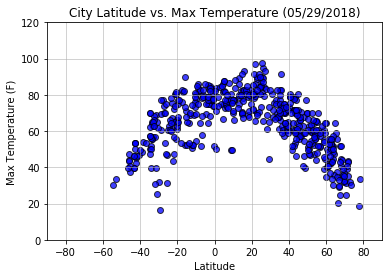

In [5]:
plt.scatter(city_weather["Latitude"], city_weather["Max Temp"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (05/29/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-90, 90)
plt.ylim(0,120)
plt.grid(alpha=.7)
plt.savefig("max_temp.png")
plt.show()


# Latitude vs. Humidity Plot 

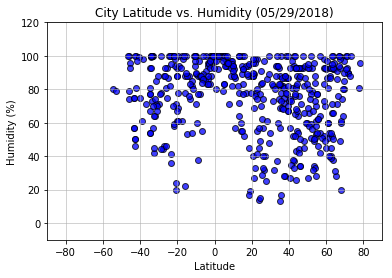

In [6]:
plt.scatter(city_weather["Latitude"], city_weather["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (05/29/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90, 90)
plt.ylim(-10,120)
plt.grid(alpha=.7)
plt.savefig("humidity.png")
plt.show()

# Latitude vs. Cloudiness Plot

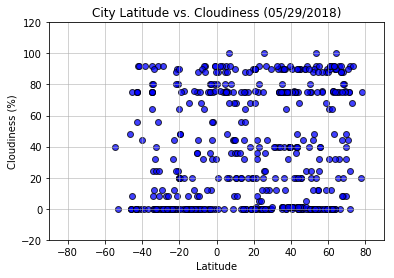

In [7]:
plt.scatter(city_weather["Latitude"], city_weather["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (05/29/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90, 90)
plt.ylim(-20,120)
plt.grid(alpha=.7)
plt.savefig("cloudiness.png")
plt.show()

# Latitude vs. Wind Speed Plot

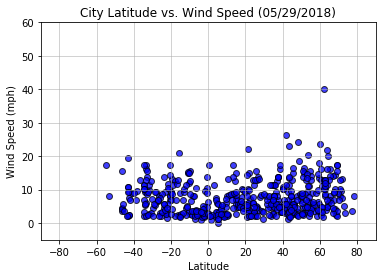

In [8]:
plt.scatter(city_weather["Latitude"], city_weather["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (05/29/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-90, 90)
plt.ylim(-5,60)
plt.grid(alpha=.7)
plt.savefig("wind_speed.png")
plt.show()